In [12]:
library(dplyr)
library(tidyverse)
library(repr)
library(tidymodels)
library(rsample)
library(tibble)
library(rsample)

# Are We Going to Last?
## Predicting Divorce Rates Based on Self Reported Levels of Negative Communication Patterns

#### **Introduction**
Every newlywed couple has asked themselves at least once: are we going to last? We use the Divorce Prediction Dataset to see how well we can predict whether a couple will get divorced. The dataset contains responses from 150 couples from Turkey on 54 questions about their relationship. The responses are on a  5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always). John Gottman is a renowned psychologist who is widely recognized for his work in maritial relationships. His research highlights four major predictors of divorce which he refers to as "Four Horsemen of the Apocalypse" - critcism, contempt, defensiveness and stonewalling. Our team has selected questions from the Divorce Prediction Dataset that meet the criteria of these negative communication patterns. Our goals is to find out how well we can predict whether or not a couple will get divorced based on their score across these four negative communication patterns. Our research findings could inform the field of marital counselling and also highlight the negative impact of bad communication patterns on the success of relationships. It also could potentially give new couples the information they need to target their weaker areas in their relationship allowing them to properly tackle issues and arguments that may arise in their marriage, in turn helping lower their chances of divorce. 

#### **Reading, Selecting and Mutating Data**

After reading in the data, we have selected the column called "Divorce" which a dummy variable that takes the value 1 for divorce and 0 for married. We have also selected the questions that are relevant to fall in one of four categories- criticism, contempt, defensiveness or stonewalling. We use the following definitions for the variables as described by John Gottman-
1. Criticism - attacking your partner’s character instead of voicing a complaint. 
2. Contempty- assuming a position of moral superiority while criticising. 
3. Defensiveness- not taking your partner’s concerns seriously and not taking responsibility for your mistakes.
4. Stonewalling- withdrawing from the interaction, shutting down, and not responding to your partner.



Since, there are more than one question corresponding to each communication style, we took the average of the scores. 

Finally, we converted the variable "Divorce" into a factor type, indicating that it represents a categorical variable with specific categories rather than a continuous or numerical variable.

In [13]:
#Reading data 
my_url <- "https://raw.githubusercontent.com/apurva-b/dsci100-project-58/main/divorce_data.csv"
data <- read_delim(my_url, delim = ";")
head(data)

Rows: 170 Columns: 55
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (55): Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11, Q12, Q13, Q14, Q15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,⋯,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,4,1,0,0,0,0,0,0,⋯,2,1,3,3,3,2,3,2,1,1
4,4,4,4,4,0,0,4,4,4,⋯,2,2,3,4,4,4,4,2,2,1
2,2,2,2,1,3,2,1,1,2,⋯,3,2,3,1,1,1,2,2,2,1
3,2,3,2,3,3,3,3,3,3,⋯,2,2,3,3,3,3,2,2,2,1
2,2,1,1,1,1,0,0,0,0,⋯,2,1,2,3,2,2,2,1,0,1
0,0,1,0,0,2,0,0,0,1,⋯,2,2,1,2,1,1,1,2,0,1


In [14]:
#Selecting the relevant columns
selected_data <- select(data, Divorce, Q32:Q37, Q52, Q31, Q38, Q41, Q48, Q53, Q54, Q49, Q50, Q51, Q42:Q47 )
head(selected_data)

Divorce,Q32,Q33,Q34,Q35,Q36,Q37,Q52,Q31,Q38,⋯,Q54,Q49,Q50,Q51,Q42,Q43,Q44,Q45,Q46,Q47
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,2,0,1,2,3,1,1,⋯,1,3,3,2,1,1,2,3,2,1
1,4,2,3,0,2,3,4,0,4,⋯,2,4,4,4,2,3,4,2,2,2
1,3,1,1,1,1,2,2,3,1,⋯,2,1,1,1,3,2,3,2,3,2
1,3,2,2,1,1,3,2,2,3,⋯,2,3,3,3,2,3,2,3,2,2
1,1,1,1,0,0,0,2,1,0,⋯,0,3,2,2,2,3,0,2,2,1
1,1,1,1,1,1,1,1,4,2,⋯,0,2,1,1,1,2,3,0,2,2


In [15]:
#Find the average scores. The scale is 0-4. 
mutated_data <- selected_data %>%
mutate( 
    Criticism= rowMeans(across(2:8)), 
    Contempt= rowMeans(across(9:14)), 
    Defensiveness= rowMeans(across(15:17)), 
    Stonewalling = rowMeans(across(18:23)))
head(mutated_data)

Divorce,Q32,Q33,Q34,Q35,Q36,Q37,Q52,Q31,Q38,⋯,Q42,Q43,Q44,Q45,Q46,Q47,Criticism,Contempt,Defensiveness,Stonewalling
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,2,0,1,2,3,1,1,⋯,1,1,2,3,2,1,1.5714286,1.6666667,2.666667,1.666667
1,4,2,3,0,2,3,4,0,4,⋯,2,3,4,2,2,2,2.5714286,2.1666667,4.000000,2.500000
1,3,1,1,1,1,2,2,3,1,⋯,3,2,3,2,3,2,1.5714286,2.3333333,1.000000,2.500000
1,3,2,2,1,1,3,2,2,3,⋯,2,3,2,3,2,2,2.0000000,2.3333333,3.000000,2.333333
1,1,1,1,0,0,0,2,1,0,⋯,2,3,0,2,2,1,0.7142857,0.6666667,2.333333,1.666667
1,1,1,1,1,1,1,1,4,2,⋯,1,2,3,0,2,2,1.0000000,1.8333333,1.333333,1.666667


In [16]:
#Converting "Divorce" into a factor type
mutated_data <- mutated_data|> 
    mutate(Divorce = as_factor(Divorce))

#Selecting the columns to make our final dataset
final_dataset <- select(mutated_data, Divorce, Criticism, Contempt, Defensiveness, Stonewalling)
head(final_dataset)

Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.5714286,1.6666667,2.666667,1.666667
1,2.5714286,2.1666667,4.000000,2.500000
1,1.5714286,2.3333333,1.000000,2.500000
1,2.0000000,2.3333333,3.000000,2.333333
1,0.7142857,0.6666667,2.333333,1.666667
1,1.0000000,1.8333333,1.333333,1.666667


#### **Summary Table**

The summary table provides a general idea of how average scores across the divorce predictors are correlated with the marriage status, where Marriage = 0, and Divorce = 1.

In [26]:
divorce_summary_table <- final_dataset |>
                group_by(Divorce) |>
                summarise(across(Criticism:Stonewalling, mean))

divorce_summary_table

Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.5598007,0.9302326,1.426357,1.391473
1,3.3724490,3.4226190,3.456349,3.327381


#### **Model**

We use knn classification model to predict whether a couple will get divorced based on their score across the four negative communication styles. To train and evaluate the knn classification model, we split the data set into two subsets: a training set and a testing set.The data is split into 75% training data and 25% testing data as it is a good split in order to train the data while making sure the testing data is large enough. Then we perform cross-validation on the training set to find the best value of k (number of nearest neighbors).The purpose of cross-validation is to evaluate how well a model trained on one subset of the data can generalize to unseen data. We then use that optimal k value to train our model. We also find the accuracy level, which we have shown as a percentage and using a confusion matrix. Finally, we use a random datapoint to test our model. 

In [17]:
#Splitting the data into training and testing data
set.seed(2023)
divorce_split <- initial_split(final_dataset, prop = 0.75, strata = Divorce)   
 divorce_train <- training(divorce_split)    
 divorce_test <- testing(divorce_split) 
 head(divorce_train)
 head(divorce_test)

Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.1428571,0.6666667,0.0000000,0.8333333
0,0.4285714,0.8333333,0.3333333,0.5000000
0,0.0000000,0.6666667,0.0000000,0.0000000
0,0.7142857,1.0000000,1.0000000,0.1666667
0,0.2857143,0.1666667,0.0000000,1.1666667
0,0.1428571,0.3333333,1.0000000,1.0000000


Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.571429,1.666667,2.666667,1.666667
1,1.571429,2.000000,1.666667,1.666667
1,4.000000,4.000000,4.000000,4.000000
1,4.000000,4.000000,4.000000,4.000000
1,4.000000,4.000000,4.000000,4.000000
1,4.000000,4.000000,4.000000,4.000000


#### **Exploratory Data Analysis**

We have create a summary of the divorce training data set and a pivot table from the summarized data to group the 4 predictors under a column and corresponding average scores under another to aid in data visualization.
We also used the training data to create a visualization using a bar graph that compares distributions of the scores from each variable (the four predictors of divorce) and state of marriage (eg. divorce or married).

#### **Training Model with K = 1**

We are now repeating the steps to train our model using the best k we found which is k=1.

Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.609375,0.9296875,1.375000,1.364583
1,3.321995,3.3809524,3.439153,3.351852


Divorce,Predictor,Score
<fct>,<chr>,<dbl>
0,Criticism,0.6093750
0,Contempt,0.9296875
0,Defensiveness,1.3750000
0,Stonewalling,1.3645833
1,Criticism,3.3219955
1,Contempt,3.3809524
1,Defensiveness,3.4391534
1,Stonewalling,3.3518519


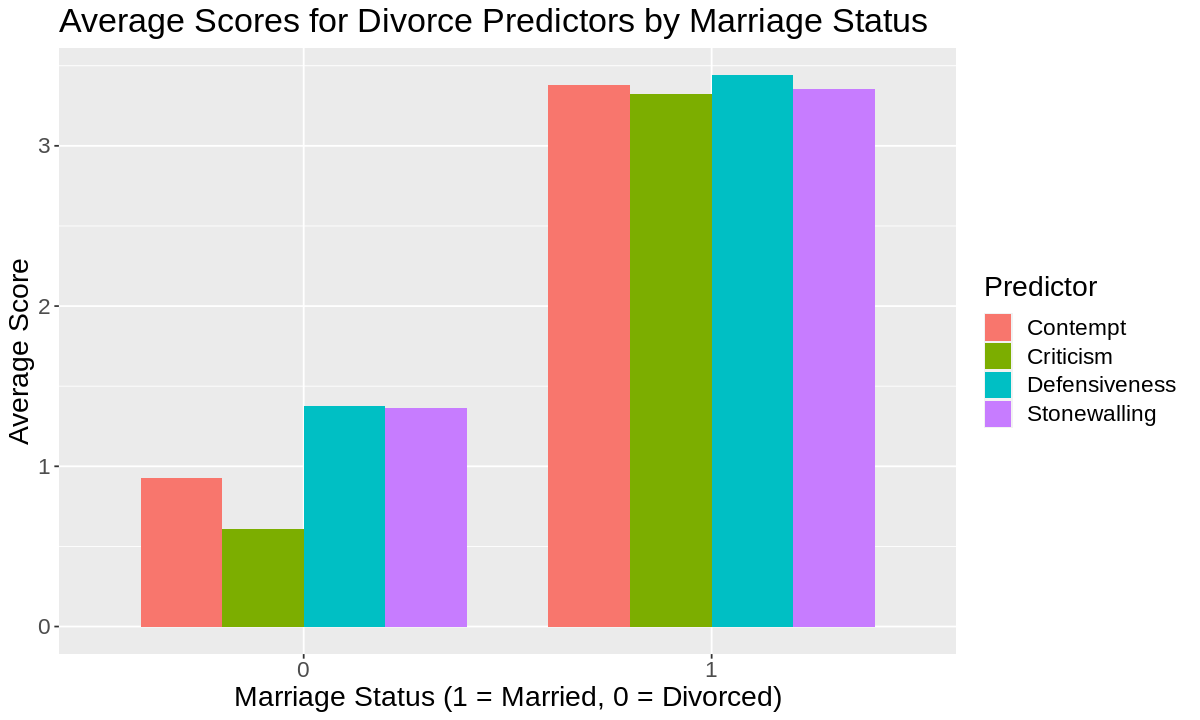

In [19]:
#Creating a summary of the divorce training dataset. 
summary_divorce <- divorce_train |>
    group_by(Divorce) |>
    summarise(across(c("Criticism", "Contempt", "Defensiveness", "Stonewalling"), ~mean(.x, na.rm = TRUE)))
summary_divorce

#Creating a Pivot table
divorce_train_longer <- summary_divorce |>
                  pivot_longer(cols = -Divorce, names_to = "Predictor", values_to = "Score")
divorce_train_longer

# load necessary package to create visuaization 
library (ggplot2)
options(repr.plot.width=10, repr.plot.height=6)
# Creating a bar graph showing average scores across the divorce predictors, grouped by marriage status
divorce_train_plot <- ggplot(divorce_train_longer, aes(x = Divorce, y = Score, fill = Predictor)) +
                        geom_bar(stat = "identity", position = "dodge", width = 0.8) +
                        labs(x = "Marriage Status (1 = Married, 0 = Divorced)", y = "Average Score", fill = "Predictor") +
                        ggtitle("Average Scores for Divorce Predictors by Marriage Status")+
                        theme(text = element_text(size=17))
divorce_train_plot

**Figure 1:** The graph above shows visualization of average scores across the four divorce predictors for marriage status. The data consists of a sample of individuals categorized as either "Married" or "Divorced." The pivot_longer() function was used to reshape the data from wide to long format, facilitating the plotting process.

The data is plotted using a bar plot and provides a clear comparison of the average scores (y-axis) for each divorce predictor between the two marriage status groups (x-axis). Each of the predictors are differentiated by different colours for easy visual comparison. The bar plot effectively illustrates any differences or similarities in the scores, aiding in the understanding of the relationship between divorce predictors and marital status.

#### **Finding K-value and Accuracy**

A 5-fold cross-validation was performed on the training data to perform K-nearest neighbors classification using cross-validation. We specify the range of values for the number of neighbors to tune over, and calculate the accuracy metric for each value of neighbors in order to compare the model's performance.

In [20]:
#Cross validation- creating 5 folds from the training dataset. The strata argument ensures that the folds have the same proportion of classes as the original dataset. 
folds <- vfold_cv(divorce_train, v = 5, strata = Divorce)

#Creating a recipe
divorce_recipe <- recipe(Divorce ~ Criticism + Contempt + Defensiveness + Stonewalling, data = divorce_train)|>
 step_normalize(Criticism , Contempt , Defensiveness, Stonewalling)

#Creating model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune("neighbors")) |>
                             set_engine("kknn") |>
                             set_mode("classification")
print(knn_spec)

#Creating a tibble that specifies the values of neighbours we want to tune over. 
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Creating a accuracies tibble that gives the accuracy metric for each value of neighbors, allowing us to compare the model's performance across different values of k. 
knn_results <- workflow() |>
               add_recipe(divorce_recipe) |>
               add_model(knn_spec) |>
               tune_grid(resamples = folds, grid = k_vals)|>
               collect_metrics()
accuracies <- knn_results |>
              filter(.metric == "accuracy")
accuracies

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune("neighbors")
  weight_func = rectangular

Computational engine: kknn 



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9689231,5,0.02245522,Preprocessor1_Model01
6,accuracy,binary,0.9682821,5,0.01453122,Preprocessor1_Model02
11,accuracy,binary,0.9605897,5,0.01217933,Preprocessor1_Model03
16,accuracy,binary,0.9605897,5,0.01217933,Preprocessor1_Model04
21,accuracy,binary,0.9605897,5,0.01217933,Preprocessor1_Model05
26,accuracy,binary,0.9605897,5,0.01217933,Preprocessor1_Model06
31,accuracy,binary,0.9525897,5,0.01465247,Preprocessor1_Model07
36,accuracy,binary,0.9605897,5,0.01217933,Preprocessor1_Model08
41,accuracy,binary,0.9525897,5,0.01465247,Preprocessor1_Model09


#### **Determining the Best K-value - Cross-Validation Plot**

Cross-validation plot depicts k values ranging from 1 to 96 to determine the K value with the highest accuracy. The x-axis shows the range of possible K values to identify nearest neighbors that would underfit or overfit the training data and give us the K-value that would have the highest accuracy.

[1] 1

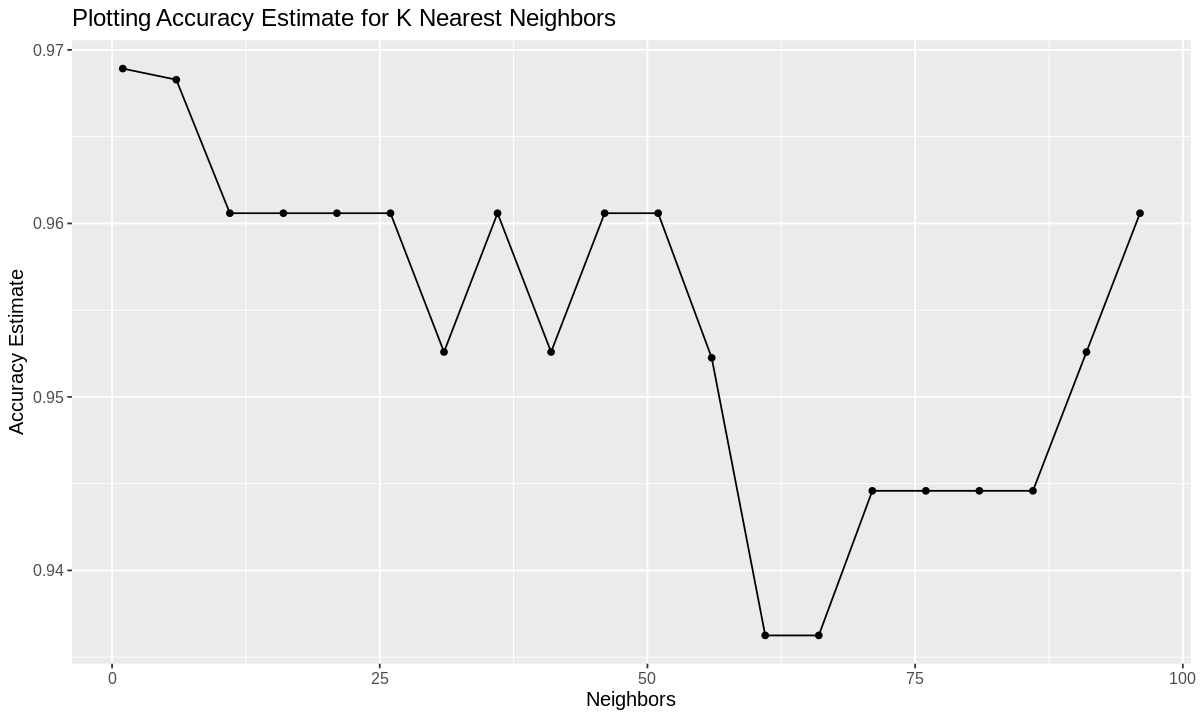

In [21]:
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      ggtitle("Plotting Accuracy Estimate for K Nearest Neighbors")+
      theme(text = element_text(size = 12))
accuracy_versus_k

 # determining k with highest accuracy estimate
k_max <- accuracies |>
         arrange(desc(mean)) |>
         slice(1) |>
        pull(neighbors)
k_max

**Figure 2**: According to our cross-validation plot, the best K-value, giving us the highest accuracy estimate, is K=1. Generally, K = 1 is indicative of a model being too influenced by the training data, and therefore overfit the data. In our model, this could be a result of insufficient data available to the model but we will use K = 1 to train the model as we have limited data from the database. 

#### **Training Model with K = 1**

We are now repeating the steps to train our model using the best k we found which is k=1.

In [22]:
knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_final <- workflow() |>
  add_recipe(divorce_recipe) |>
  add_model(knn_best)

knn_final_fit <- fit(knn_final, data = divorce_train)

#### **Prediction of Accuracy and Confusion Matrix** 


We are now determining how accurate are the predictions of our model. The accuracy of our model is about 95.3% which is reliable enough to test marriage status using our predictors.
The confusion matrix provides a tabular representation of the model's predictions, showing the number of true positives, true negatives, false positives, and false negatives. The confusion matrix shows 21 observations predicting marriage and 20 observations predicting divorce correctly and only classified one observation as marriage when it should have been divorce and one observation as divorce when it should have been marriage. Overall, the model performed well when evaluated with accuracy and a confusion matrix. 

In [23]:
predict_final <- predict(knn_final_fit, divorce_test) |>
                    bind_cols(divorce_test) |>
                    metrics(truth = Divorce, estimate = .pred_class) |>
                    filter(.metric == "accuracy")
predict_final

confmatrix_final <- predict(knn_final_fit, divorce_test) |>
                    bind_cols(divorce_test) |>
                    conf_mat(truth = Divorce, estimate = .pred_class)
confmatrix_final

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9534884


          Truth
Prediction  0  1
         0 21  1
         1  1 20

#### **Testing Model with New Data**

We use hypothetical scores to predict whether that couple will get divorced or not. Given the specific hypothetic score we can see that the couple is likely to get divorced. In general. we find that couples with hifh scores across the four negative communication style are more likely to get divorced. 

In [24]:
# Hypothetical test scores to evaluate results obtained from model
new_data <- data.frame (Defensiveness = 3, Contempt = 2.5, Criticism = 2, Stonewalling = 1)
new_data
# Results from the Model: 1 = Divorce, 0 = Married 
predictions <- predict(knn_final_fit, new_data)
print(predictions)

Defensiveness,Contempt,Criticism,Stonewalling
<dbl>,<dbl>,<dbl>,<dbl>
3,2.5,2,1


# A tibble: 1 × 1
  .pred_class
  <fct>      
1 1          


#### **Summary**

Our model can predict marriage outcome given communication pattern scores with 95% accuracy. In general, we found that couples with higher scores in criticism, contempt, stomewalling and defensivenss have a higher chance of being divorced. We hope that our research leads to couples examining their commincation patterns especially during conflict. 
John Gottman found contempt to be the worst of the four horseman categories (Driver, J.  et al., 2012, Gottman, J. M., et al 2015) as it leads to destruction and dangerous behaviors. During our data analysis we were unable to support this conclusion of John Gottman as it appeared in figure 1 that across all 4 categories the higher the score the more likely they were to get divorced, not retaining to any specific category. To break down the contribution of each negative pattern maybe the topic of further research. 

#### **References**
Driver, J., Tabares, A., Shapiro, A. F., & Gottman, J. M. (2012). Couple interaction in happy and unhappy marriages: Gottman Laboratory studies. In F. Walsh (Ed.), Normal family processes: Growing diversity and complexity (pp. 57–77). The Guilford Press.
Gottman, J. M., & Gottman, J. S. (2015). Gottman couple therapy. In A. S. Gurman, J. L. Lebow, & D. K. Snyder (Eds.), Clinical handbook of couple therapy (pp. 129–157). The Guilford Press.